In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#importing file - csv
file = "../Resources/top_songs_of_2010_decade.csv"

In [4]:
#reading csv
top_songs_file = pd.read_csv(file, encoding='ISO 8859-1')
top_songs_file.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
top_songs_file3 = top_songs_file


In [6]:
#dropping the columns i dont need
top_songs_file3.drop(["Unnamed: 0", "pop", "spch", "dur"], axis=1, inplace=True)
top_songs_file3.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,acous
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,19
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,24
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,10
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,0
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,2


In [7]:
#renaming columns
top_songs_file3 = top_songs_file3.rename(columns = {"nrgy": "energy",
                                                   "dnce": "dance",
                                                   "val": "valence",
                                                   "acous": "acousticness"})
top_songs_file3.head()

,title,artist,top genre,year,bpm,energy,dance,dB,live,valence,acousticness
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,19
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,24
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,10
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,0
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,2


In [8]:
#organizing the data to prepare for visual, getting the mean of eah attribute and grouping by year
trends_by_year = top_songs_file3[["year", "bpm", "energy", "dance", "dB", "live", "valence", "acousticness"]
                                ].groupby("year").mean().sort_values(by="year").reset_index()

trends_by_year.round(decimals=2)

,year,bpm,energy,dance,dB,live,valence,acousticness
0,2010,122.06,77.90,64.53,-4.90,21.18,57.00,11.63
1,2011,119.08,74.89,63.64,-5.02,20.94,53.70,13.34
2,2012,121.09,75.49,65.71,-4.86,15.83,64.17,4.86
3,2013,121.68,73.87,62.04,-5.14,19.72,53.18,10.32
4,2014,123.00,67.78,62.53,-5.78,17.29,52.09,17.55
5,2015,119.77,70.34,63.66,-5.62,18.31,52.53,16.60
6,2016,114.32,67.24,63.32,-6.71,17.74,45.15,15.88
7,2017,116.80,69.17,65.37,-5.62,15.37,52.28,16.60
8,2018,114.59,65.47,67.20,-5.67,14.75,48.77,12.78
9,2019,112.45,64.74,69.71,-5.77,15.16,50.81,21.74


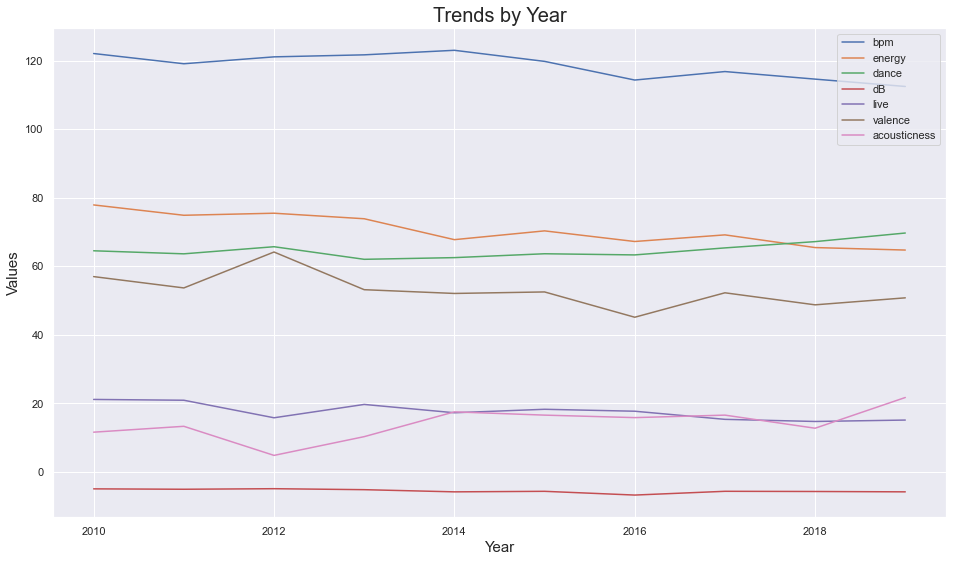

In [9]:
plt.figure (figsize=(16,9))
sns.set(style="darkgrid")

attributes = ["bpm", "energy", "dance", "dB", "live", "valence", "acousticness"]
# year = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]


sns.lineplot(x= "year", y= "bpm", data= trends_by_year)
sns.lineplot(x= "year", y= "energy", data= trends_by_year)
sns.lineplot(x= "year", y= "dance", data= trends_by_year)
sns.lineplot(x= "year", y= "dB", data= trends_by_year)
sns.lineplot(x= "year", y= "live", data= trends_by_year)
sns.lineplot(x= "year", y= "valence", data= trends_by_year)
sns.lineplot(x= "year", y= "acousticness", data= trends_by_year)

plt.title("Trends by Year", fontsize= 20)
plt.xlabel("Year", fontsize= 15)
plt.ylabel("Values", fontsize= 15)
plt.legend(attributes)

plt.savefig("../Output Data/trends_by_year.png")
plt.show()

In [10]:
corr = trends_by_year[["bpm", "energy", "dance", "dB", "live", "valence", "acousticness"]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,bpm,energy,dance,dB,live,valence,acousticness
bpm,1.00,0.72,-0.69,0.61,0.57,0.62,-0.51
energy,0.72,1.00,-0.44,0.80,0.72,0.74,-0.72
dance,-0.69,-0.44,1.00,-0.03,-0.65,0.01,0.27
dB,0.61,0.80,-0.03,1.00,0.39,0.84,-0.63
live,0.57,0.72,-0.65,0.39,1.00,0.14,-0.23
valence,0.62,0.74,0.01,0.84,0.14,1.00,-0.69
acousticness,-0.51,-0.72,0.27,-0.63,-0.23,-0.69,1.00
